Cameron Taylor

Math Foundations of ML

Homework 3

### Problem 1 ###

In the last week we started by formalizing linear regression as an attempt to fit a function $f : R^{D} -> R$ to a series of data points. We talked about needing to limit the search space of functions to a class of functions, often all linear functions. We can express this problem as a minimization of the sum of error between our functional approximation and the ground truth at each point. This is known as least-squares regression. We continued by discussing regression using nonlinear basis functions which has a similar formulation and then discussed some properties of the matrix $A$ in $Ax = y$. 

The invertibility of $A^{T}A$ and also the number of solutions to $Ax = y$ were key points. We showed that there is always at least one solution, but it is also possible that there are infinitely many. In this case we need an approach to picking just one solution which was the topic of the most recent class. We discussed the minimum energy principle as one approach, which simply takes the $x$ s.t. $||x||$ is minimized. Another problem when there are infinitely many solutions is that the space of solutions is unbounded, so some solutions could have vectors of arbitrary size added and the change the function. The approach to this problem is similar to the choosing the minimum, but instead we change the problem to minimize $||y - Ax||^{2}_{2} + \delta||x||^{2}_{2}$, where $\delta \geq 0$. This can approach is more flexible and can be used to weight the importance of the solution vector being small by changing $\delta$.

### Problem 2###

#### a) ####
Assume $z \ne 0$. Because $<z, \psi_{n}> = 0$, $z$ is orthogonal to {$\psi_{n}$} and therefore linearly independent from {$\psi_{n}$}. Since $z$ is linearly independent and $\ne 0$, it cannot be written as a linear combination of {$\psi_{n}$}, meaning it is outside the span{$\psi_{n}\} = T$. This is a contradicition because we know that $z \in T$, so $z = 0$.

#### b) ####

Assume $Gx = 0$ for some $x \ne 0$. We know that $G = A^{t}A$, where $A = [\psi_{1}, \psi_{2}, ..., \psi_{n}]$ and ${\psi_{n}}$ are linearly independent. So we have $A^{t}Ax = 0$ -> $A^{t}Ax = A^{t}x'$, where $x' = Ax$. In part a, we showed that $Ax = 0$ iff $x = 0$ which implies that  $A^{t}x = 0$ iff $x = 0$ so $x'=0$. This implies that $x = 0$ proving that G is invertible.

Alternativley, in the notes we saw that Null($A^{T}A)$ = Null($A$). Again, from part a, we have shown that the Null($A$) is 0 ($Ax = 0$ iff $x = 0$) and we know that $G = A^{T}A, so Null($G$) = 0. This implies G is also invertible.

### Problem 3 ###

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_basis(N):
    phi = lambda z: np.exp(-z**2)
    t = np.linspace(0,1,1000)

    plt.figure(1)
    plt.clf()
    for kk in range(N):
        plt.plot(t, phi(N*t - kk + 0.5))
        

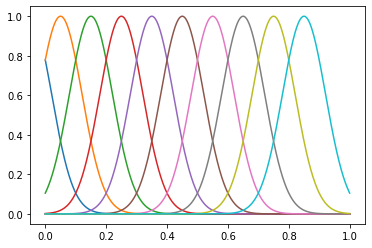

In [4]:
plot_basis(10)

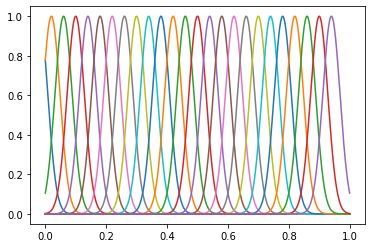

In [5]:
plot_basis(25)

In [27]:
def plot_function(a, N):
    phi = lambda z: np.exp(-z**2)
    t = np.linspace(0,1,1000)
    y = np.zeros(1000)
    
    for jj in range(1, N+1):
        y = y+a[jj-1]*phi(N*t - jj + 0.5)
        
    plt.figure()
    plt.plot(t,y)

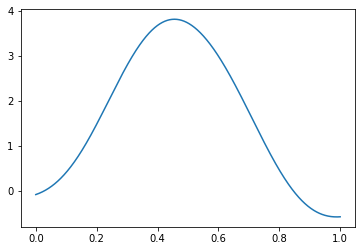

In [28]:
plot_function([-.5, 3, 2, -1], 4)

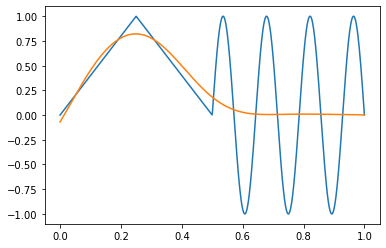

In [33]:
# Part C 
import scipy.integrate as integrate

def solve_closest_point(N):
    phi = lambda z: np.exp(-z**2)
    x = lambda z: (z < .25)*(4*z) + (z >= 0.25)*(z < 0.5)*(-4*z+2) - (z >= 0.5)*np.sin(14*np.pi*z)
    gram_matrix = np.zeros((N,N))
    gram_vector = np.zeros((N,1))
    
    
    for i in range(N):
        for j in range(N):
            matrix_elem = lambda z: phi(N*z - i + 0.5)*phi(N*z - j + 0.5)
            gram_matrix[i][j] = integrate.quad(matrix_elem, 0, 1)[0]
            
    for i in range(N):
        vector_elem = lambda z: x(z)*phi(N*z - i + 0.5)
        gram_vector[i] = integrate.quad(vector_elem, 0, 1)[0]
        
    alphas = np.matmul(np.linalg.inv(gram_matrix), gram_vector)
    

    test_x = np.linspace(0, 1, 1000)
    test_y = [x(point) for point in test_x]

    function_x = np.linspace(0,1,1000)
    function_y = [sum([alphas[i]*phi(N*t - i + 0.5) for i in range(N)]) for t in function_x]

    plt.plot(test_x, test_y)
    plt.plot(function_x, function_y)
    
solve_closest_point(5)


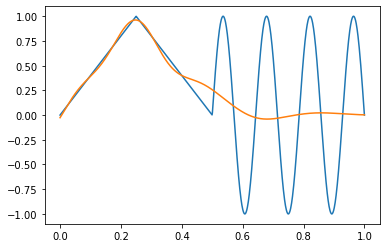

In [34]:
solve_closest_point(10)

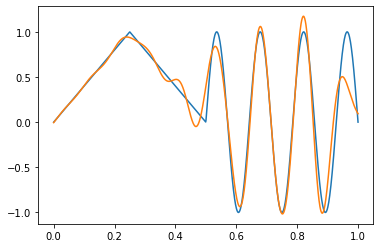

In [35]:
solve_closest_point(20)

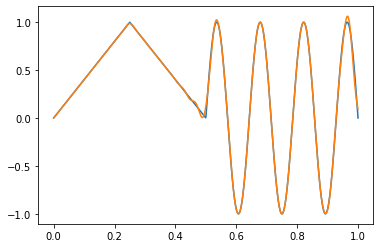

In [36]:
solve_closest_point(50)

### Problem 4 ###

#### a) ####
$||u_{2}||$ = $||v_{2} - \sum_{i=1}^{1}<v_{2}, \psi_{1}> \psi_{1}||$

$ = ||v_{2} - <v_{2}, \psi_{1}> \psi_{1}||$

$ = ||v_{2} - <v_{2}, \frac{v_{1}}{||v_{1}||}>\frac{v_{1}}{||v_{1}||}||$

$ = ||v_{2} - \alpha {v1}||$, where $\alpha = <v_{2}, \frac{v_{1}}{||v_{1}||}>\frac{1}{||v_{1}||}$

Since by the definition of linear independence $v_{2}$ cannot be written as $\alpha v_{1}$, we can say that $v_{2} \ne \alpha v_{1}$ so, $v_{2} - \alpha v_{1} \ne 0$.


#### b) ####
Proof for span:

span{$v_{1}, v_{2}$} = $av_{1} + bv_{2}$

span{$\psi_{1}, \psi_{2}$} = $a'\psi_{1} + b'\psi_{2}$

$= \frac{a}{||v_{1}||}v_{1} + \frac{b}{||u_{2}||}u_{2}$

$= \frac{a}{||v_{1}||}v_{1} + \frac{b}{||u_{2}||}(v_{2} - <v_{2}, v_{1}>v_{1})$

$= \frac{a}{||v_{1}||}v_{1} + \frac{b}{||u_{2}||}v_{2} - \frac{b<v_{2}, v_{1}>}{||u_{2}||}v_{1})$

$= (\frac{a}{||v_{1}||} - \frac{b<v_{2}, v_{1}>}{||u_{2}||})v_{1} + \frac{b}{||u_{2}||}v_{2}$

This is equivalent to the span{$v_{1}, v_{2}$} = $av_{1} + bv_{2}$, where $a = \frac{a}{||v_{1}||} - \frac{b<v_{2}, v_{1}>}{||u_{2}||}$ and $b = \frac{b}{||u_{2}||}$.


Proof for orthogonality:

$<\psi_{1}, \psi_{2}> = <a, b - proj_{a}b>$, where $a = \frac{v_{1}}{||v_{1}||}$ and $b = \frac{v_{2}}{||u_{2}||}$

$= a * (b - proj_{a}b)$

$= a*b - a*proj_{a}b$

$= a*b - a*(\frac{a*b}{|a|^{2}}a)$

$= a*b - (\frac{a*b}{|a|^{2}}|a|^{2})$

$= a*b - a*b = 0$.

$<\psi_{1}, \psi_{2}> = 0$ -> $\psi_{1}$ and $\psi_{2}$ are orthogonal. 

Proof for normality:

$||\psi_{i}|| = \sqrt{<\psi_{i}, \psi_{i}>}$ 

$<\psi_{1}, \psi_{1}> = ||\psi{1}||||\psi_{1}||cos(0)$

$ = 1 * 1 * 1 = 1$.

$||\psi_{1}|| = \sqrt{1} = 1$

$<\psi_{2}, \psi_{2}> = ||\psi_{2}||||\psi_{2}||cos(0)$

$=||\frac{u_{2}}{||u_{2}}||||\frac{u_{2}}{||u_{2}||}||cos(0)$

$= 1 * 1 * 1$

$||\psi_{2}|| = \sqrt{1} = 1$

#### c) ####

Inductive proof for span:

Base Case: $Span\{v_{1}, v_{2}\} = Span\{\psi_{1}, \psi_{2}\}$ from part b.

Induction Hypothesis: $Span\{v_{1}, ..., v_{k}\} = Span\{\psi_{1}, ..., \psi_{k}\}$

Now prove for k+1...

$Span\{\psi_{1}, ..., \psi_{k}\} = \alpha_{1}\psi_{1} + ... + \alpha_{k+1}\psi_{k+1}$

$ = (\alpha_{1}\psi_{1} + ... + \alpha_{k}\psi_{k}) + \frac{\alpha_{k+1}}{||u_{k+1}||}v_{k+1} - \sum_{l=1}^{k}<v_{k+1}, \psi_{l}>\psi_{l}$

$ = \alpha_{1}\psi_{1} + ... + \alpha_{k}\psi_{k} + \frac{\alpha_{k+1}}{||u_{k+1}||}v_{k+1} - (b_{1}\psi_{1} + ... + b_{k}\psi_{k}), b_{l} = <v_{k+1}, \psi_{l}>$

$ = (\alpha_{1} - b_{1})\psi_{1} + ... + (\alpha_{k} - b_{k})\psi_{k} + \frac{\alpha_{k+1}}{||u_{k+1}||}v_{k+1}$

$ = Span\{v_{1}, ..., v_{k}\} + \frac{\alpha_{k+1}}{||u_{k+1}||}v_{k+1}$

$ = Span\{v_{1}, ..., v_{k+1}\}$ 

Inductive proof for orthogonality:

Base Case $\psi_{1}$ is orthogonal to $\psi_{2}$ from part b.

Induction Hypothesis: $\{\psi_{k}\}$ is all orthogonal for 1...k

Since we assume $\{\psi_{k}\}$ is all orthogonal for 1...k, we only need to show $\psi_{k+1}$ is orthogonal to all of $\{\psi_{k}\}$.

$= <\psi_{k+1}, \psi_{i}> \forall i \in 1..k$

$= \frac{1}{||u_{k+1}||}<v_{k+1} - \sum_{l=1}^{k}<v_{k+1}, \psi_{l}>\psi_{i}>$

$= \frac{1}{||u_{k+1}||}<v_{k+1}, \psi_{i}> - \sum_{l=1}^{k}<<v_{k+1}, \psi_{l}>\psi_{l}, \psi_{i}>$

$= \frac{1}{||u_{k+1}||}<v_{k+1}, \psi_{i}> - \sum_{l=1, l \ne i}^{k}<<v_{k+1}, \psi_{l}>\psi_{l}, \psi_{i}> - <<v_{k+1}, \psi_{i}>\psi_{i}, \psi_{i}$

$= \frac{1}{||u_{k+1}||}<v_{k+1}, \psi_{i}> - \sum_{l=1, l \ne i}^{k}<<v_{k+1}, \psi_{l}>\psi_{l}, \psi_{i}> - <v_{k+1}, \psi_{i}><\psi_{i}, \psi_{i}>$

$= \frac{1}{||u_{k+1}||}<v_{k+1}, \psi_{i}> - \sum_{l=1, l \ne i}^{k}<<v_{k+1}, \psi_{l}>\psi_{l}, \psi_{i}> - <v_{k+1}, \psi_{i}>*1$

$= \sum_{l=1, l \ne i}^{k}<<v_{k+1}, \psi_{l}>\psi_{l}, \psi_{i}>$

$= 0$, since we are summing $<\alpha\psi_{i}, \psi_{j}>$, where $i \ne j$.

Proof that $u_{k} \ne 0$:

$u_{k} = v_{k} - \sum_{i=1}^{k-1}<v_{k}, \psi_{i}>\psi_{i}$

$= v_{k} - \sum_{i=1}^{k-1}\alpha_{i}\psi_{i}||$

Using our proof above of $Span\{v_{1}, ..., v_{k}\} = Span\{\psi_{1}, ..., \psi_{k}\}$, we can say...

$= v_{k} - \sum_{i=1}^{k-1}\alpha_{i}v_{i}$

Then with a similar argument to part a, we can say that because $v_{k} \ne  \sum_{i=1}^{k-1}\alpha_{i}v_{i}$, which is true because by definition it cannot be written as a linear combination of other {$v_{k}$}, then $u_{k} \ne 0$. This also implies that $||u_{k}|| \ne 0$.

Proof for normality:

We know from above that $u_{k} \forall k \ne 0$. Since $\psi_{k} = \frac{u_{k}}{||u_{k}||}$, we can comfortably say that $||\psi_{k}|| = 1$.

### Problem 5 ###

#### a) ####
Proof for orthogonality:

$<v_{k,l}(s,t), v_{m,n}(s,t)> = \int_{0}^{1}\int_{0}^{1}\psi_{k}(s)\psi_{l}(t)\psi_{m}(s)\psi_{n}(t){ds}{dt}$

$=\int_{0}^{1}\psi_{k}(s)\psi_{m}(s){ds} * \int_{0}^{1}\psi_{l}(t)\psi_{n}(t){dt}$

It is given that {$\psi_{k}(t), k \geq 0$} is an orthobasis so $\int_{0}^{1}\psi_{k}(s)\psi_{m}(s){ds} = 0$ and $\int_{0}^{1}\psi_{l}(t)\psi_{n}(t){dt} = 0$.

$=\int_{0}^{1}\psi_{k}(s)\psi_{m}(s){ds} * \int_{0}^{1}\psi_{l}(t)\psi_{n}(t){dt} = 0$

Proof for normality:

$||v_{k,l}(s,t)|| = \sqrt{<v_{k,l}(s,t), v_{k,l}(s,t)>}$

$<v_{k,l}(s,t), v_{k,l}(s,t)> = \int_{0}^{1}\int_{0}^{1}\psi_{k}(s)\psi_{l}(t)\psi_{k}(s)\psi_{l}(t){ds}{dt}$

$=\int_{0}^{1}\psi_{k}(s)\psi_{k}(s){ds} * \int_{0}^{1}\psi_{l}(t)\psi_{l}(t){dt}$

It is given that {$\psi_{k}(t), k \geq 0$} is an orthobasis so $\int_{0}^{1}\psi_{k}(s)\psi_{k}(s){ds} = 1$ and $\int_{0}^{1}\psi_{l}(t)\psi_{l}(t){dt} = 1$.

$=\int_{0}^{1}\psi_{k}(s)\psi_{m}(s){ds} * \int_{0}^{1}\psi_{l}(t)\psi_{n}(t){dt} = 1$

$||v_{k,l}(s,t)|| = \sqrt{1} = 1$

Proof for span:

$x(s,t) = \sum_{k,l}\alpha_{k,l}v_{k,l}(s,t) = \sum_{k,l}\alpha_{k,l}\psi_{k}(s)\psi_{l}(t)$

If we fix one value of s=s_{0}, we get...

$x(s_{0},t) = \sum_{k}\psi_{k}(s_{0})\sum_{l}\alpha_{k,l}\psi_{l}(t)$

Since $\psi_{k}(s_{0})$ is a function of a fixed value it becomes a constant. So the entire sum can represented as a sum of constants multiplied by basis functions, in this case in terms of $t$.

If we fix one value of t=t_{0}, we get...

$x(s,t_{0}) = \sum_{l}\psi_{l}(t_{0})\sum_{k}\alpha_{k,l}\psi_{k}(s)$

Similarly to above, $\psi_{k}(t_{0})$ is a function of a fixed value it becomes a constant. So the entire sum can represented as a sum of constants multiplied by basis functions, in this case in terms of $s$.

This means that for any fixed value of s or t, we have a basis in the t and s dimensions respectivley. This means that we can represent a function  represent any function in s and any other function in t at the same time, implying that $v_{k,l}(s,t)$ is an orthobasis for $L_{2}([0,1]^{2})$.


#### b) ####

In part a, we argued that an orthobasis for $L_{2}([0,1]^{2})$ is created by multiplying two basis vectors for $L_{2}([0,1])$. We can this as an inductive step and generalize as we create an orthobasis for $L_{2}([0,1]^{D})$ by multiplying D basis vectors for $L_{2}([0,1])$.